In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


data = "resources/04-14-2020.csv"

data_414 = pd.read_csv(data)

In [2]:
# drop rows
data_414 = data_414.loc[(data_414["Deaths"] !=0) & (data_414["Confirmed"] !=0) ]
data_414.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4/14/2020 23:33,32.3182,-86.9023,3953,114,NaN,3839.0,1.0,84.305541,33117.0,493.0,2.883886,84000001,USA,706.285508,12.471541
1,Alaska,US,4/14/2020 23:33,61.3707,-152.4044,285,9,98.0,276.0,2.0,47.678875,8348.0,32.0,3.157895,84000002,USA,1396.572809,11.228070
3,Arizona,US,4/14/2020 23:33,33.7298,-111.4312,3809,131,249.0,3678.0,4.0,52.330651,44096.0,580.0,3.439223,84000004,USA,605.821053,15.227094
4,Arkansas,US,4/14/2020 23:33,34.9697,-92.3731,1498,32,427.0,1466.0,5.0,57.859574,21131.0,130.0,2.136182,84000005,USA,816.175343,8.678238
5,California,US,4/14/2020 23:33,36.1162,-119.6816,25356,768,NaN,24588.0,6.0,64.669453,202208.0,5163.0,3.028869,84000006,USA,515.723328,20.362044


In [3]:
# Create new dataframe
data_df_414 = pd.DataFrame(data_414[["Province_State", "Last_Update", "Confirmed", "Deaths",
                                      "Active","Incident_Rate", "People_Tested",
                                      "People_Hospitalized","Mortality_Rate", "Testing_Rate","Hospitalization_Rate"]])
data_df_414 = data_df_414.reset_index(drop=True)
data_df_414.head()

,Province_State,Last_Update,Confirmed,Deaths,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,4/14/2020 23:33,3953,114,3839.0,84.305541,33117.0,493.0,2.883886,706.285508,12.471541
1,Alaska,4/14/2020 23:33,285,9,276.0,47.678875,8348.0,32.0,3.157895,1396.572809,11.228070
2,Arizona,4/14/2020 23:33,3809,131,3678.0,52.330651,44096.0,580.0,3.439223,605.821053,15.227094
3,Arkansas,4/14/2020 23:33,1498,32,1466.0,57.859574,21131.0,130.0,2.136182,816.175343,8.678238
4,California,4/14/2020 23:33,25356,768,24588.0,64.669453,202208.0,5163.0,3.028869,515.723328,20.362044


In [4]:
# Create new data with the newest information
new_data_df = data_df_414.loc[data_df_414["Last_Update"] == "4/14/2020 23:33"]
new_data_df.head()

,Province_State,Last_Update,Confirmed,Deaths,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,4/14/2020 23:33,3953,114,3839.0,84.305541,33117.0,493.0,2.883886,706.285508,12.471541
1,Alaska,4/14/2020 23:33,285,9,276.0,47.678875,8348.0,32.0,3.157895,1396.572809,11.228070
2,Arizona,4/14/2020 23:33,3809,131,3678.0,52.330651,44096.0,580.0,3.439223,605.821053,15.227094
3,Arkansas,4/14/2020 23:33,1498,32,1466.0,57.859574,21131.0,130.0,2.136182,816.175343,8.678238
4,California,4/14/2020 23:33,25356,768,24588.0,64.669453,202208.0,5163.0,3.028869,515.723328,20.362044


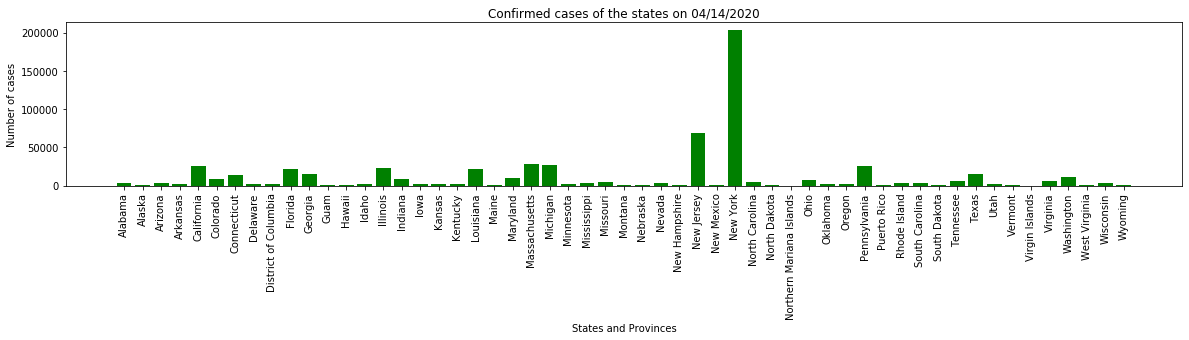

In [13]:
# Plot line of comfirmed cases
x_axis = np.arange(len(new_data_df["Province_State"]))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(new_data_df["Province_State"], new_data_df["Confirmed"], color="green")
plt.xticks(tick_locations, new_data_df["Province_State"], rotation=90)

plt.title("Confirmed cases of the states on 04/14/2020")
plt.xlabel("States and Provinces")
plt.ylabel("Number of cases")

plt.show()

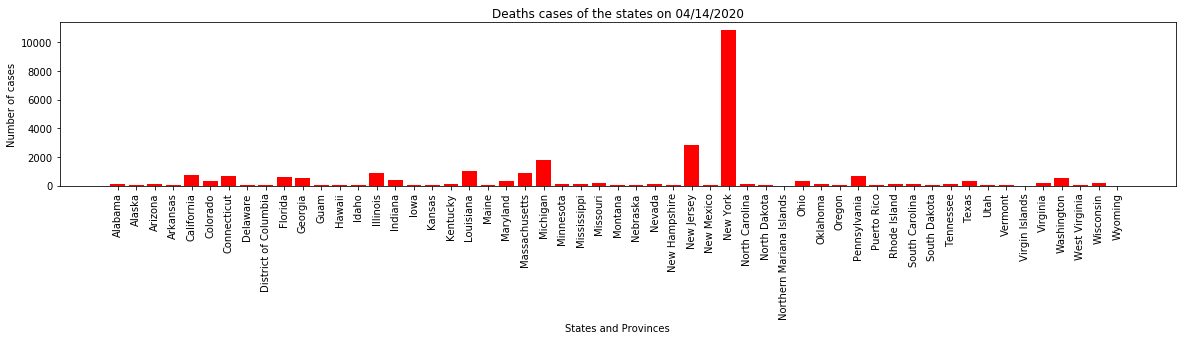

In [14]:
# Plot line deaths cases
x_axis = np.arange(len(new_data_df["Province_State"]))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(new_data_df["Province_State"], new_data_df["Deaths"], color="red")
plt.xticks(tick_locations, new_data_df["Province_State"], rotation=90)

plt.title("Deaths cases of the states on 04/14/2020")
plt.xlabel("States and Provinces")
plt.ylabel("Number of cases")

plt.show()

The correlation coefficient for testing rate and confirmed cases is 0.51


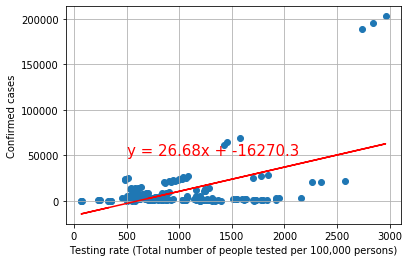

In [7]:
# Create scatter plot of confirmed cases and testing rate
correlation = st.pearsonr(data_df_414["Confirmed"], data_df_414["Testing_Rate"])
print(f"The correlation coefficient for testing rate and confirmed cases is {round(correlation[0],2)}")

x_values = data_df_414["Testing_Rate"]
y_values = data_df_414["Confirmed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(500,50000),fontsize=15,color="red")
plt.xlabel("Testing rate (Total number of people tested per 100,000 persons)")
plt.ylabel("Confirmed cases")
plt.grid()

plt.savefig("output_data/Confirmed cases and testing rate.png")

plt.show()

There is moderate positive linear relationship between the confirmed the cases and testing rate based on the states.

The correlation coefficient for testing rate and confirmed cases is 0.2


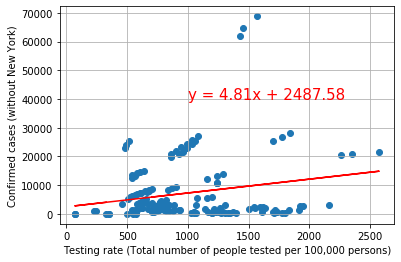

In [8]:
# Create scatter plot of confirmed cases and testing rate (without New York)
data_df_nony = data_df_414.loc[(data_df_414["Province_State"] != "New York")]

correlation = st.pearsonr(data_df_nony["Confirmed"], data_df_nony["Testing_Rate"])
print(f"The correlation coefficient for testing rate and confirmed cases is {round(correlation[0],2)}")

x_values = data_df_nony["Testing_Rate"]
y_values = data_df_nony["Confirmed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000,40000),fontsize=15,color="red")
plt.xlabel("Testing rate (Total number of people tested per 100,000 persons)")
plt.ylabel("Confirmed cases (without New York)")
plt.grid()

plt.savefig("output_data/Confirmed cases and testing rate (without New York).png")

plt.show()

The correlation coefficient for hospitalization rate and mortality rate is 0.45


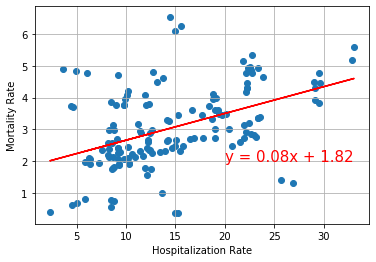

In [9]:
# Create new dataframe of mortality rate and hospitalization rate and drop na row
data_mh_rate = pd.DataFrame(data_df_414[["Province_State","Mortality_Rate","Hospitalization_Rate"]])
date_mh_rate = data_mh_rate.dropna(how="any", inplace=True)

correlation = st.pearsonr(data_mh_rate["Hospitalization_Rate"], data_mh_rate["Mortality_Rate"])
print(f"The correlation coefficient for hospitalization rate and mortality rate is {round(correlation[0],2)}")

# Scatter plot
x_values = data_mh_rate["Hospitalization_Rate"]
y_values = data_mh_rate["Mortality_Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2),fontsize=15,color="red")
plt.xlabel("Hospitalization Rate")
plt.ylabel("Mortality Rate")
plt.grid()

plt.savefig("output_data/Hospitalization rate and mortality rate.png")

plt.show()

As the correlation coefficient is 0.45, there is moderate linear relationship between hospitalization rate and mortality rate. This also suggests that the mortality rate rises with hospitalization rate.

The correlation coefficient for testing rate and mortality rate is -0.22


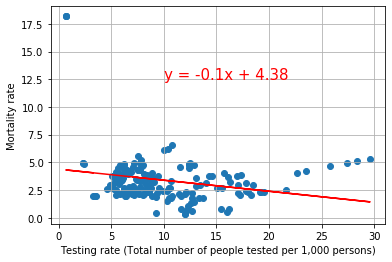

In [10]:
# Create scatter plot of mortality rate and testing rate
correlation = st.pearsonr(data_df_414["Mortality_Rate"], data_df_414["Testing_Rate"])
print(f"The correlation coefficient for testing rate and mortality rate is {round(correlation[0],2)}")

x_values = data_df_414["Testing_Rate"]/100
y_values = data_df_414["Mortality_Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12.5),fontsize=15,color="red")
plt.xlabel("Testing rate (Total number of people tested per 1,000 persons)")
plt.ylabel("Mortality rate")
plt.grid()

plt.savefig("output_data/Testing rate and mortality rate.png")

plt.show()

There is very week downhill relationship between testing rate and mortality rate.

The correlation coefficient for hospitalization rate and testing rate is -0.28


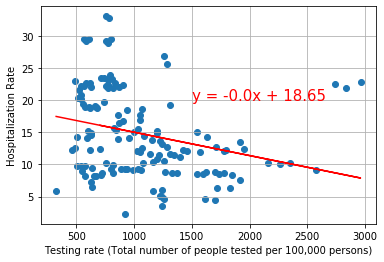

In [11]:
# Create new dataframe of mortality rate and hospitalization rate and drop na row
data_th_rate = pd.DataFrame(data_df_414[["Province_State","Testing_Rate","Hospitalization_Rate"]])
date_th_rate = data_th_rate.dropna(how="any", inplace=True)

correlation = st.pearsonr(data_th_rate["Testing_Rate"], data_th_rate["Hospitalization_Rate"])
print(f"The correlation coefficient for hospitalization rate and testing rate is {round(correlation[0],2)}")

# Scatter plot
x_values = data_th_rate["Testing_Rate"]
y_values = data_th_rate["Hospitalization_Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1500,20),fontsize=15,color="red")
plt.xlabel("Testing rate (Total number of people tested per 100,000 persons)")
plt.ylabel("Hospitalization Rate")
plt.grid()

plt.savefig("output_data/Hospitalization rate and testing rate.png")

plt.show()

There is very week negative relationship between testing rate and hospitalization rate.